<a href="https://colab.research.google.com/github/alfinmaulani/skripsi/blob/master/3ekstraksi_dan_klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install --upgrade scikit-learn
import numpy as np
import pandas as pd
import io
import os
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import gensim
import ast

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

load korpus

In [2]:
url1 = '/content/drive/MyDrive/dataisear(preputama).csv'
url2 = '/content/drive/MyDrive/dataisear(preptambah).csv'
df = pd.read_csv(url1)

In [5]:
temp=[]
for senten in df.dokumen:
  temp.append(ast.literal_eval(senten))
df.dokumen=temp

pilih model

In [7]:
pakai_model=1

load model

In [8]:
if pakai_model == 1:#load model word2vec
  from gensim.models import word2vec
  model = gensim.models.word2vec.Word2Vec.load('/content/drive/MyDrive/korpuswiki600M(preputama).w2v')
elif pakai_model == 2:#load model glove
  !pip install glove-python-binary
  from glove import Glove
  from glove import Corpus
  model=Glove.load('/content/drive/MyDrive/glove.model')

cek model word2vec

In [9]:
model.wv.vectors.shape

(1263138, 100)

In [ ]:
model.wv["moment"]

cek model glove

In [ ]:
model.word_vectors.shape

array([[-1.38042110e-01, -7.22731061e-02,  8.60750999e-02, ...,
         2.08342204e-01, -1.09346167e-03,  2.49755065e-01],
       [-4.86669324e-02, -3.01531564e-02,  2.96433428e-02, ...,
         7.29205770e-02,  1.32343629e-03,  8.70889215e-02],
       [-2.10199762e-01, -7.48029439e-02,  1.29497352e-01, ...,
         2.79371546e-01, -3.23691685e-02,  3.27171828e-01],
       ...,
       [ 8.08056025e-03, -6.31030540e-04, -3.63506564e-03, ...,
        -1.06357003e-02,  8.07690243e-05, -1.00125495e-02],
       [ 1.02141356e-02,  2.92651032e-03, -7.15933501e-03, ...,
        -1.50295605e-02, -3.31608783e-03, -1.47873352e-02],
       [-2.46649635e-04, -3.15596556e-03, -5.07804675e-03, ...,
        -1.69652998e-03,  4.01892947e-03, -2.10104997e-03]])

In [ ]:
model.word_vectors[glove.dictionary['moment']]

(9352, 100)

average base ekstraksi fitur

In [11]:
import array
ekstrak=[]
temp=array.array('i',(0,)*100)

if pakai_model == 1:
  for senten in df.dokumen:
    for word in senten:
      temp=np.add(temp,model.wv[word])
    temp=temp/len(senten)
    ekstrak.append(temp)

elif pakai_model == 2:
  for senten in sentences:
    for word in senten:
      temp=np.add(temp,model.word_vectors[model.dictionary[word]])
    temp=temp/len(senten)
    ekstrak.append(temp)

has_vec=ekstrak

In [12]:
X=has_vec
y=df.emosi
print(np.shape(X))
print(np.shape(y))
# print(X)
# print(y)

(5395, 100)
(5395,)


klasifikasi svm

In [13]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support

In [14]:
def klasifikasi(krnl):
  clf = svm.SVC(kernel=krnl, decision_function_shape='ovr')
  y_pred = cross_val_predict(clf, X, y, cv=10)
  ConfusionMatrixDisplay.from_predictions(y, y_pred)
  plt.show()
  print(accuracy_score(y, y_pred))
  print(precision_recall_fscore_support(y, y_pred, average='macro'))

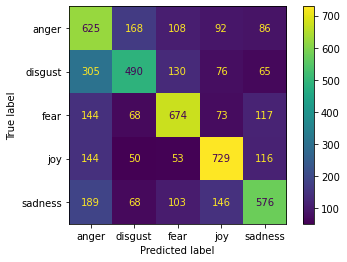

0.5734939759036145
(0.5818176405825259, 0.5730452600500087, 0.5738229990318399, None)


In [15]:
klasifikasi('poly')

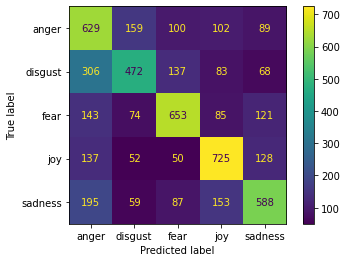

0.5684893419833179
(0.5766891164115153, 0.5679917447483561, 0.5683661849628768, None)


In [16]:
klasifikasi('rbf')

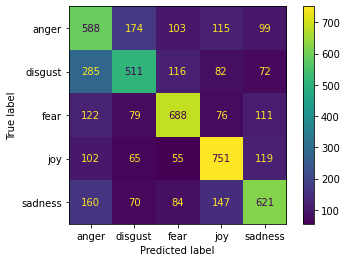

0.5855421686746988
(0.5885795695598431, 0.5850764847599113, 0.5851992418504869, None)


In [17]:
klasifikasi('linear')